Creating and Backtesting Mean-Reversion STRG (Bollinger Bands)

Getting Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("intraday.csv", parse_dates = ["time"], index_col = "time")

In [8]:
data

,price
time,
2018-01-01 22:00:00+00:00,1.201205
2018-01-02 04:00:00+00:00,1.207055
2018-01-02 10:00:00+00:00,1.204440
2018-01-02 16:00:00+00:00,1.205800
2018-01-02 22:00:00+00:00,1.204690
...,...
2019-12-29 22:00:00+00:00,1.119920
2019-12-30 04:00:00+00:00,1.119940
2019-12-30 10:00:00+00:00,1.120095


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2070 entries, 2018-01-01 22:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2070 non-null   float64
dtypes: float64(1)
memory usage: 32.3 KB


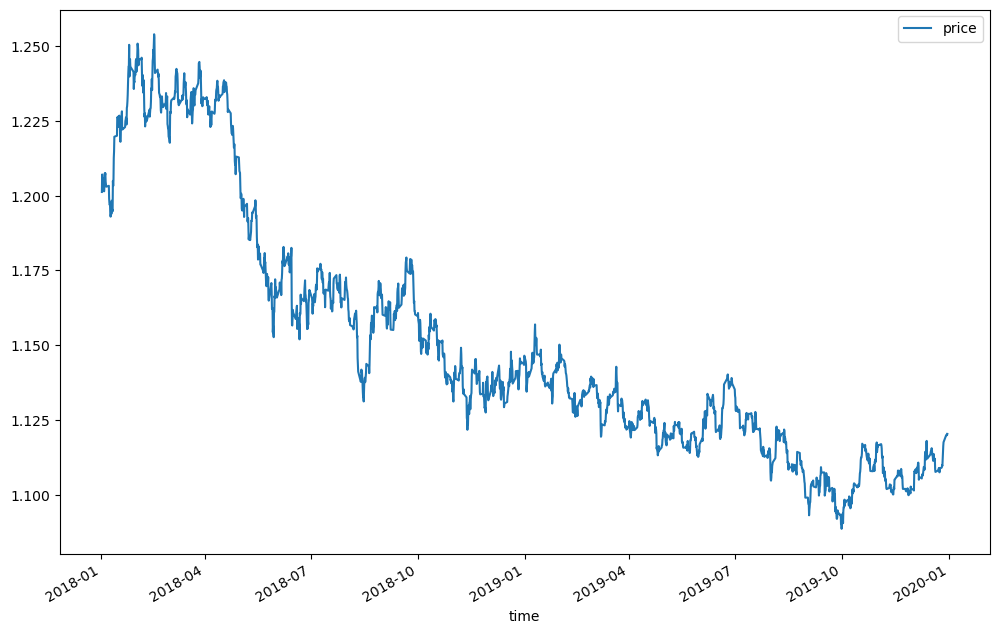

In [12]:
data.plot(figsize = (12, 8))
plt.show()

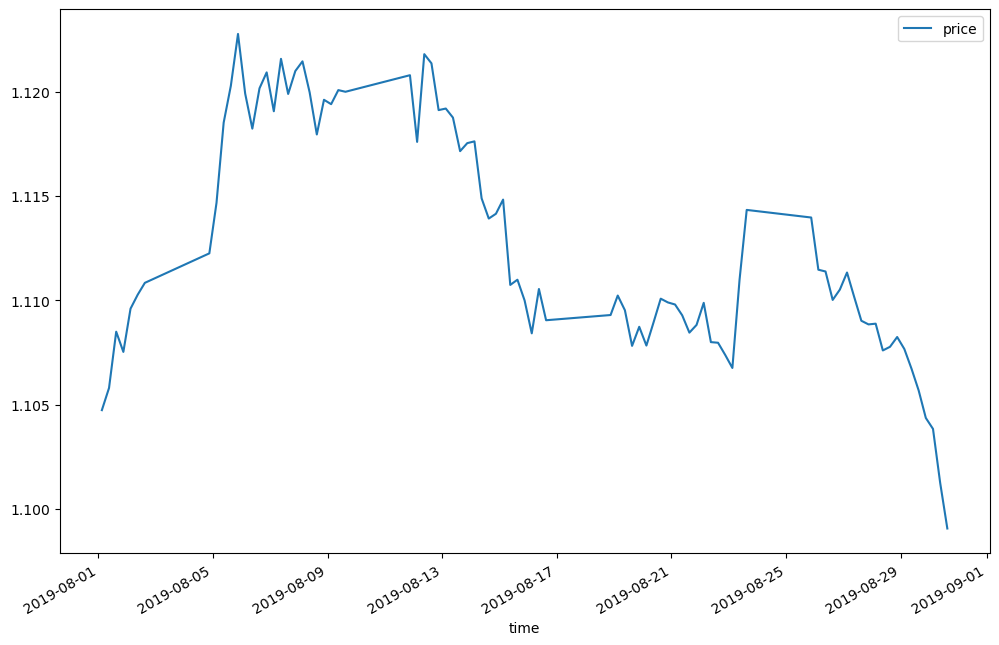

In [14]:
data.loc["2019-08"].plot(figsize = (12, 8))
plt.show()

In [16]:
data["returns"] = np.log(data.div(data.shift(1)))

In [18]:
data

,price,returns
time,,
2018-01-01 22:00:00+00:00,1.201205,NaN
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138


///////////////////////////////////////////////////////

Defining a Mean-Reversion Strategy, Part 1

Bollinger bands: Consits of SMA, Upper, and Lower Bands +-2, Std Dev from SMA

In [24]:
SMA = 30
dev = 2

In [26]:
data["SMA"] = data["price"].rolling(SMA).mean()

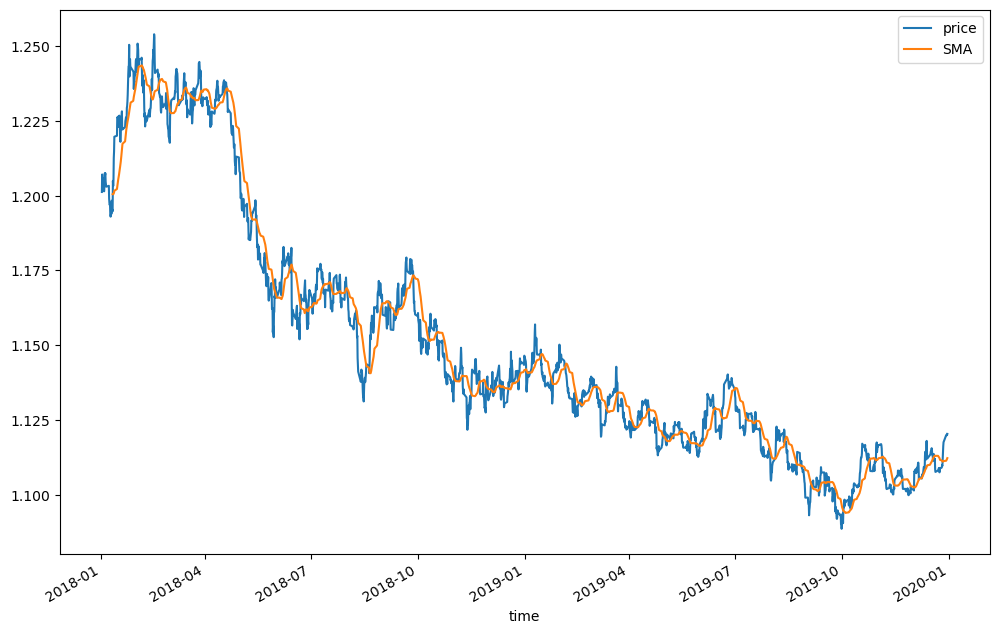

In [28]:
data[["price", "SMA"]].plot(figsize = (12, 8))
plt.show()

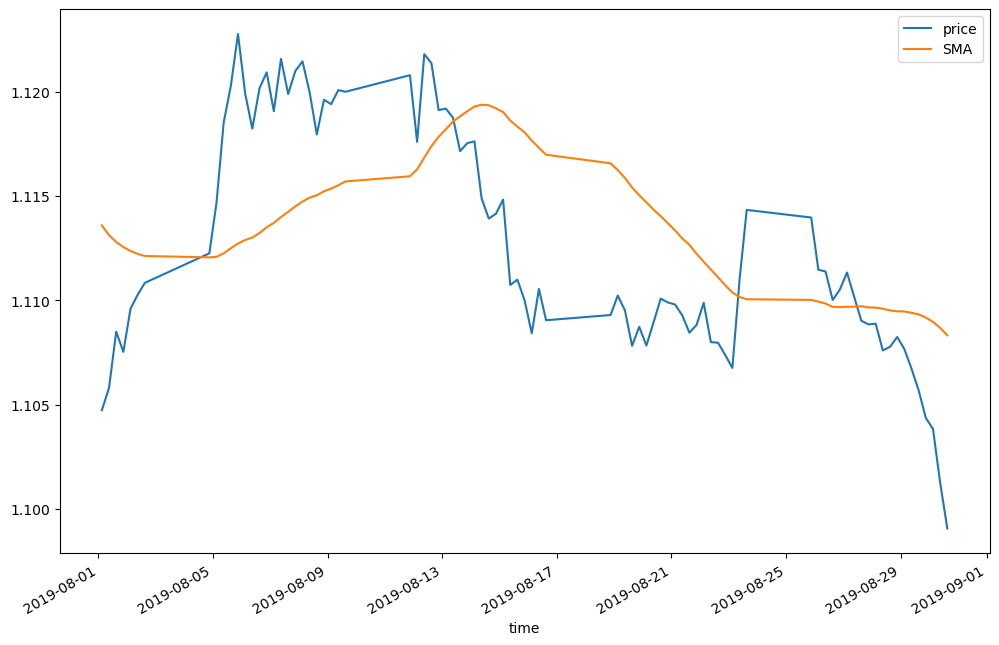

In [30]:
data.loc["2019-08", ["price", "SMA"]].plot(figsize = (12, 8))
plt.show()

In [32]:
data["price"].rolling(SMA).std()

time
2018-01-01 22:00:00+00:00         NaN
2018-01-02 04:00:00+00:00         NaN
2018-01-02 10:00:00+00:00         NaN
2018-01-02 16:00:00+00:00         NaN
2018-01-02 22:00:00+00:00         NaN
                               ...   
2019-12-29 22:00:00+00:00    0.003088
2019-12-30 04:00:00+00:00    0.003400
2019-12-30 10:00:00+00:00    0.003729
2019-12-30 16:00:00+00:00    0.004008
2019-12-30 22:00:00+00:00    0.004288
Name: price, Length: 2070, dtype: float64

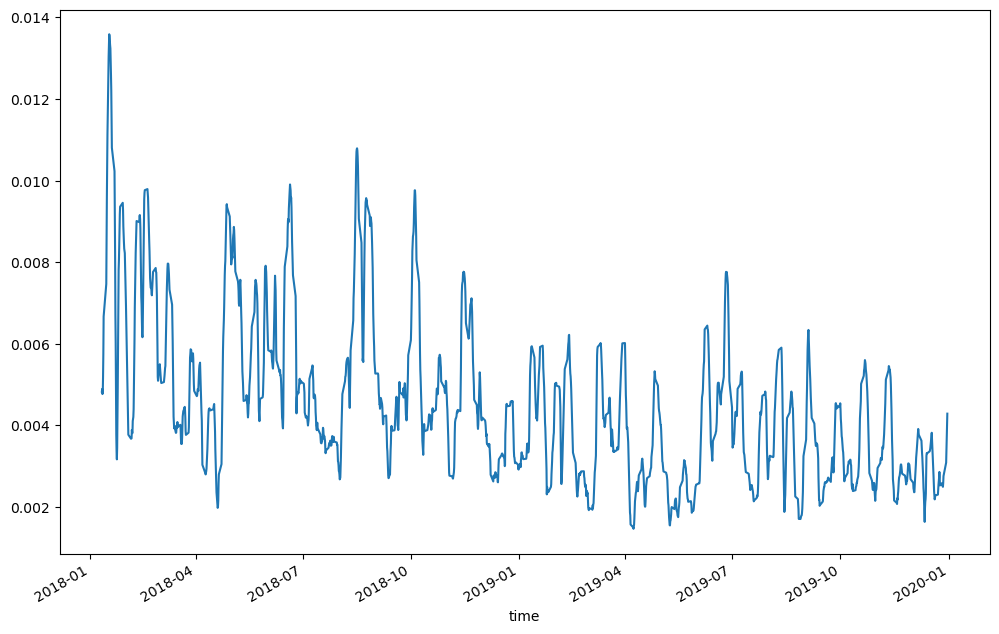

In [34]:
data["price"].rolling(SMA).std().plot(figsize = (12, 8))
plt.show()

In [38]:
data["Lower"] = data["SMA"] - data["price"].rolling(SMA).std()*dev

In [40]:
data["Upper"] = data["SMA"] + data["price"].rolling(SMA).std()*dev

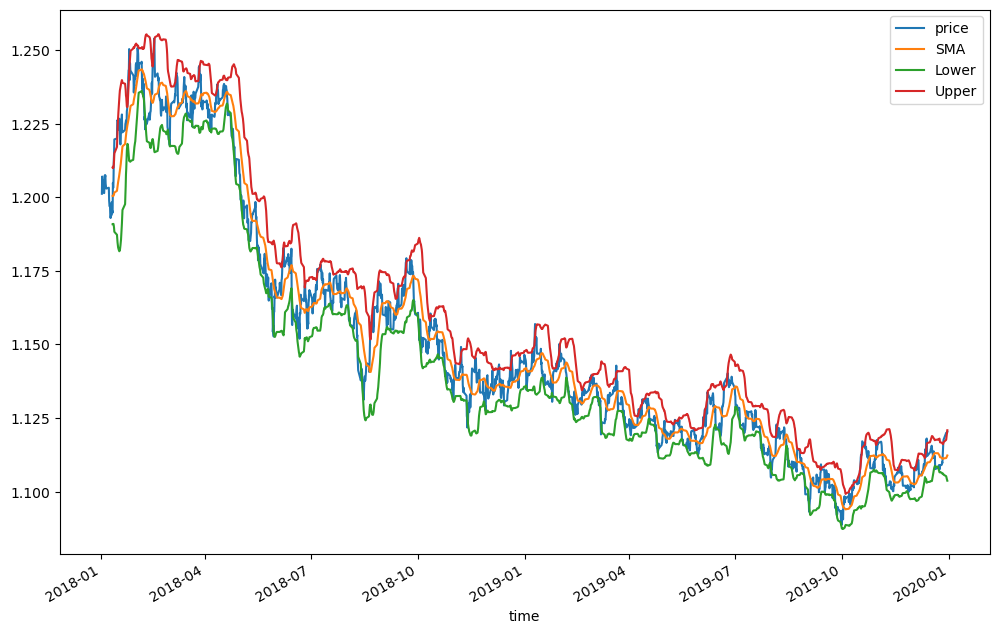

In [42]:
data.drop(columns = "returns").plot(figsize = (12, 8))
plt.show()

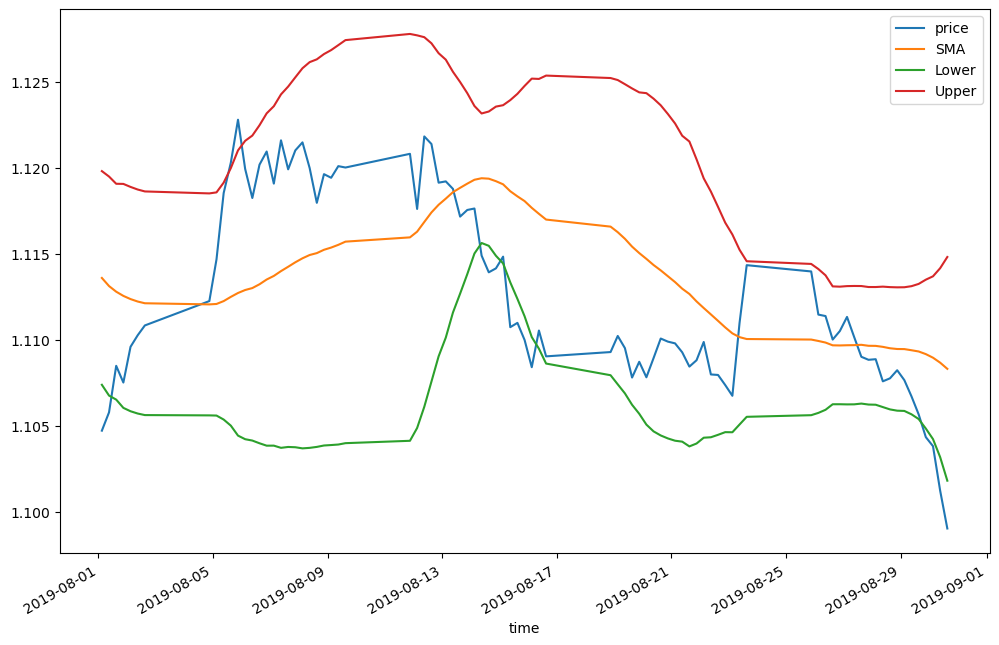

In [44]:
data.drop(columns = "returns").loc["2019-08"].plot(figsize = (12, 8))
plt.show()

In [46]:
data.dropna(inplace = True)